## Clustering Algorithms and Their Use Cases – Theoretical Assignment:

1. What is Clustering?
Clustering is an unsupervised machine learning technique used to group similar data points into clusters based on some similarity or distance measure (e.g., Euclidean distance). The algorithm does not use labeled data and automatically identifies inherent groupings in the dataset.

2. Common Clustering Algorithms:


a. K-Means Clustering
How it works: Divides data into K clusters by minimizing the intra-cluster variance (distance between points and the cluster center).

Key Features:

Fast and efficient on large datasets.

Requires the number of clusters (K) beforehand.

Use Cases:

Customer segmentation in marketing.

Image compression.

Grouping search results.


b. Hierarchical Clustering
How it works: Builds a tree-like structure (dendrogram) to show how data points can be merged or split into clusters.

Agglomerative: Bottom-up (starts with individual points and merges).

Divisive: Top-down (starts with one big cluster and splits).

Use Cases:

Gene or protein sequence analysis.

Document or article categorization.

Social network analysis.


c. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
How it works: Groups together points that are closely packed together and marks outliers (noise) that lie alone in low-density regions.

Key Features:

Doesn’t require number of clusters.

Can find arbitrarily shaped clusters.

Use Cases:

Anomaly detection (e.g., fraud).

Spatial data clustering (e.g., earthquake epicenters).

Traffic pattern analysis.


d. Mean Shift Clustering
How it works: Moves data points toward the mode (highest density point) iteratively to form clusters.

Use Cases:

Image segmentation.

Object tracking in video.

Behavioral data clustering.


e. Gaussian Mixture Models (GMM)
How it works: Assumes data is generated from a mixture of several Gaussian distributions. Uses Expectation-Maximization (EM) to find probabilities of cluster membership.

Use Cases:

Speech recognition.

Financial modeling.

Market segmentation.

## Practical Tasks :
### Task : Customer Segmentation

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

In [65]:
df = pd.read_csv('customer_segmentation.csv')

In [66]:
df.shape

(2240, 29)

In [67]:
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
510,9925,1981,PhD,Together,39665.0,1,0,25-05-2013,97,127,...,7,1,0,0,0,0,0,3,11,0
1017,8562,1969,Graduation,Together,54165.0,0,0,28-05-2013,72,127,...,2,0,0,0,0,0,0,3,11,0
104,8908,1959,Graduation,Married,87195.0,0,0,08-05-2014,35,217,...,1,0,0,0,0,0,0,3,11,1
252,10089,1974,Graduation,Divorced,102692.0,0,0,05-04-2013,5,168,...,2,0,1,1,1,1,0,3,11,1
165,4370,1966,Graduation,Together,43482.0,2,1,13-11-2013,83,18,...,6,0,0,0,0,0,0,3,11,0
1084,6072,1970,Master,Single,75345.0,0,0,02-02-2013,16,918,...,3,0,0,0,1,0,0,3,11,1
975,10286,1962,Graduation,Married,83715.0,0,0,03-02-2014,2,318,...,0,0,0,0,0,0,0,3,11,0
2085,1052,1969,Graduation,Married,56796.0,0,1,16-02-2013,24,656,...,7,0,0,0,0,0,0,3,11,0
65,8082,1971,Graduation,Married,25721.0,1,0,21-05-2013,75,1,...,7,0,0,0,0,0,0,3,11,1
111,7431,1991,PhD,Single,68126.0,0,0,10-11-2012,40,1332,...,9,0,1,0,0,0,0,3,11,1


#### Column Description : 

Id: Unique identifier for each individual in the dataset.

Year_Birth: The birth year of the individual.

Education: The highest level of education attained by the individual.

Marital_Status: The marital status of the individual.

Income: The annual income of the individual.

Kidhome: The number of young children in the household.

Teenhome: The number of teenagers in the household.

Dt_Customer: The date when the customer was first enrolled or became a part of the company's database.

Recency: The number of days since the last purchase or interaction.

MntWines: The amount spent on wines.

MntFruits: The amount spent on fruits.

MntMeatProducts: The amount spent on meat products.

MntFishProducts: The amount spent on fish products.

MntSweetProducts: The amount spent on sweet products.

MntGoldProds: The amount spent on gold products.

NumDealsPurchases: The number of purchases made with a discount or as part of a deal.

NumWebPurchases: The number of purchases made through the company's website.

NumCatalogPurchases: The number of purchases made through catalogs.

NumStorePurchases: The number of purchases made in physical stores.

NumWebVisitsMonth: The number of visits to the company's website in a month.

AcceptedCmp3: Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.

AcceptedCmp4: Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.

AcceptedCmp5: Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.

AcceptedCmp1: Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.

AcceptedCmp2: Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.

Complain: Binary indicator (1 or 0) whether the individual has made a complaint.

Z_CostContact: A constant cost associated with contacting a customer.

Z_Revenue: A constant revenue associated with a successful campaign response.

Response: Binary indicator (1 or 0) whether the individual responded to the marketing campaign.


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [69]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [70]:
df.dropna(inplace=True)

In [71]:
df.duplicated().sum()

np.int64(0)

In [72]:
df.drop(['ID'],axis=1,inplace=True)

In [73]:
cols = df.columns

In [74]:
for i in cols:
    print(df[i].value_counts())
    print("------------------------------------")

Year_Birth
1976    89
1971    86
1975    83
1972    78
1978    76
1970    75
1965    74
1973    72
1969    70
1974    69
1956    55
1979    53
1958    52
1952    52
1977    52
1968    51
1966    50
1959    50
1954    49
1960    49
1955    48
1963    44
1967    44
1962    44
1982    44
1951    42
1957    41
1986    41
1983    41
1964    41
1980    39
1984    38
1981    38
1953    35
1961    35
1985    32
1949    30
1950    29
1989    29
1988    29
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1945     8
1944     7
1943     6
1995     5
1993     5
1994     3
1996     2
1900     1
1893     1
1899     1
1941     1
1940     1
Name: count, dtype: int64
------------------------------------
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
------------------------------------
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         

In [75]:
df = df.drop(['Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1)

In [76]:
obj_cols = ['Education','Marital_Status']

In [77]:
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

In [78]:
df.sample(10)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
714,1982,50272.0,1,0,75,99,13,66,43,8,...,True,False,False,False,False,False,False,True,False,False
2082,1960,51651.0,0,1,32,293,6,23,13,6,...,True,False,False,False,False,True,False,False,False,False
613,1967,22574.0,2,1,28,25,0,8,2,0,...,True,False,False,False,False,True,False,False,False,False
96,1960,47916.0,0,1,72,505,0,26,0,0,...,True,False,False,False,False,False,False,False,True,False
2098,1976,81929.0,1,0,60,1486,55,278,49,0,...,False,True,False,False,False,True,False,False,False,False
1226,1955,61284.0,0,0,76,618,15,106,20,7,...,False,False,True,False,False,False,True,False,False,False
932,1951,64950.0,0,1,29,819,0,72,12,0,...,False,False,True,False,False,False,True,False,False,False
1214,1972,56721.0,1,1,64,157,6,39,6,13,...,True,False,False,False,False,True,False,False,False,False
2175,1975,79174.0,0,0,2,1074,37,518,193,92,...,False,False,True,False,False,True,False,False,False,False
937,1970,67536.0,0,1,45,1253,0,447,23,71,...,False,False,True,False,False,True,False,False,False,False


In [79]:
df.isnull().sum()

Year_Birth                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Response                   0
Education_Basic            0
Education_Graduation       0
Education_Master           0
Education_PhD              0
Marital_Status_Alone       0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status_Widow       0
Marital_Status_YOLO        0
dtype: int64

#### 1 : Find Customer segments using K-means clustering algorithm

In [81]:
scaler = StandardScaler()

In [83]:
scl_data = scaler.fit_transform(df)

In [85]:
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i)
    kmean.fit(scl_data)
    wcss.append(kmean.inertia_)

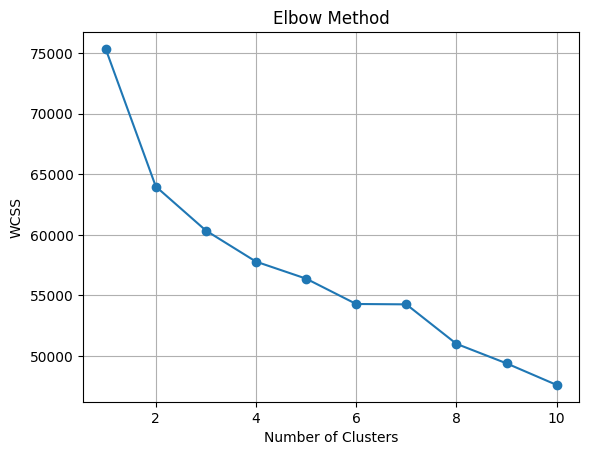

In [87]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [114]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(scl_data)

In [115]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scl_data)

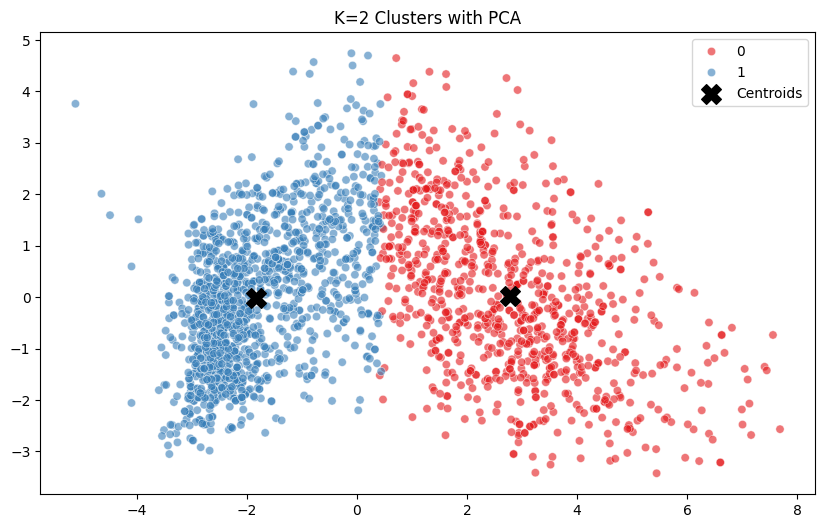

In [116]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=labels, palette='Set1', alpha=0.6)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.title('K=2 Clusters with PCA')
plt.legend()
plt.show()

#### 2 : Find Customer segments using Hierarchical clustering algorithm.

In [118]:
linked = linkage(scl_data, method='ward')

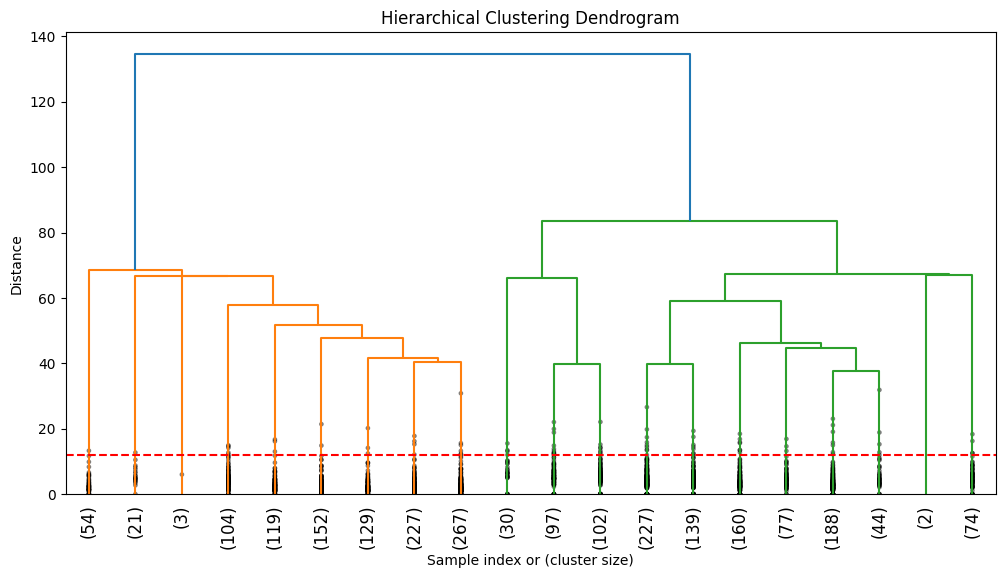

In [119]:
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.axhline(y=12, color='r', linestyle='--')  # adjust this threshold as needed
plt.show()


In [ ]:
k = 2
cluster_labels = fcluster(linked, k, criterion='maxclust')
df['Hierarchical_Cluster'] = cluster_labels


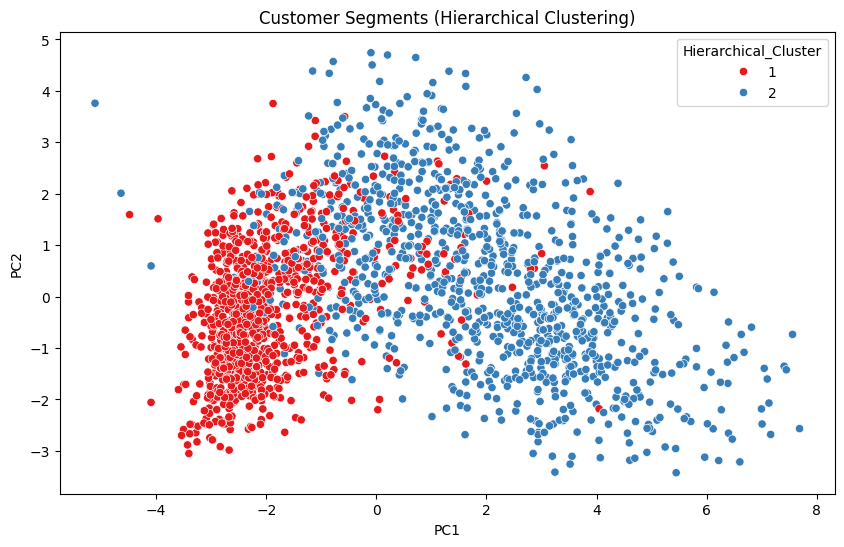

In [123]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scl_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['Hierarchical_Cluster'], palette='Set1')
plt.title('Customer Segments (Hierarchical Clustering)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


#### 3. Compare the Clusters and conclude your analysis.

In [129]:
kmeans_score = silhouette_score(scl_data, df['KMeans_Cluster'])
hc_score = silhouette_score(scl_data, df['Hierarchical_Cluster'])

print(f"KMeans Silhouette Score: {kmeans_score:.3f}")
print(f"Hierarchical Silhouette Score: {hc_score:.3f}")


KMeans Silhouette Score: 0.123
Hierarchical Silhouette Score: 0.130
